In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from numpy import asarray
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
departure= pd.read_excel("New Departure file v2.xlsx")

In [3]:
print(departure.shape)

(91251, 13)


In [4]:
departure.head()

,Name,Res_No,Sub_cat,Macro_RT,Arrival,Departure,Adults_Ch,Nation,Continet,Source,Source_Group,Room_Rate,Res_Date
0,"1Puranik, Panduranga",702217,DQB,Deluxe,2018-08-23,2018-08-24,1 / 0,India,India,RSOB,Others,5000.00,2018-08-14
1,"Aljaadi, Gamila",719917,DQB,Deluxe,2018-10-30,2018-11-01,1 / 0,Oman,Asia,BOOKINGS.COM,Online Aggregators,4479.20,2018-10-29
2,"Carpaij, Sander Wouter Maarten",706281,DQB,Deluxe,2018-09-05,2018-09-09,1 / 0,NaN,NaN,CSO,Sales Team,5000.00,2018-08-31
3,"Chachad, Asmit",673325,DQB,Deluxe,2018-04-15,2018-04-16,1 / 0,India,India,RSOM,Others,4630.01,2018-04-13
4,"Gandhi, Raj",723991,DQB,Deluxe,2018-12-09,2018-12-13,1 / 0,India,India,CSO,Sales Team,5000.00,2018-11-16


In [5]:
departure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91251 entries, 0 to 91250
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          91251 non-null  object        
 1   Res_No        91251 non-null  int64         
 2   Sub_cat       91251 non-null  object        
 3   Macro_RT      91251 non-null  object        
 4   Arrival       91251 non-null  datetime64[ns]
 5   Departure     91251 non-null  datetime64[ns]
 6   Adults_Ch     91251 non-null  object        
 7   Nation        89337 non-null  object        
 8   Continet      89337 non-null  object        
 9   Source        91066 non-null  object        
 10  Source_Group  91251 non-null  object        
 11  Room_Rate     91251 non-null  float64       
 12  Res_Date      91251 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(8)
memory usage: 9.1+ MB


In [6]:
##EDA

In [7]:
departure=departure.rename(columns={"Res. No": "Res_num"})
departure=departure.rename(columns={"Adults/Ch.": "Adults_Child"})
departure=departure.rename(columns={"Rm. Rate": "Room_Rate"})

In [8]:
#MISSING VALUE TREATMENT

In [9]:
pd.DataFrame(departure.isnull().sum().sort_values(ascending=False), columns = ['Number of Null'])

,Number of Null
Nation,1914
Continet,1914
Source,185
Name,0
Res_No,0
Sub_cat,0
Macro_RT,0
Arrival,0
Departure,0
Adults_Ch,0


In [10]:
departure = departure[departure.Room_Rate != 0.0]
departure.dropna(subset=['Source'],inplace=True)
departure['Continent'] = departure['Continet'].fillna(departure['Continet'].mode()[0])

In [11]:
#CREATING NEW FEATURE COLUMNS

In [12]:
departure['Arrival']=pd.to_datetime(departure['Arrival'], format='%d/%m/%y')
departure['Departure']=pd.to_datetime(departure['Departure'],format='%d/%m/%y')
departure['Res. Date']=pd.to_datetime(departure['Res_Date'],format='%d/%m/%y')

In [13]:
departure['Duration']=departure['Departure']-departure['Arrival']
departure['Booking_time']=departure['Arrival']-departure['Res_Date']

In [14]:
departure.head()

,Name,Res_No,Sub_cat,Macro_RT,Arrival,Departure,Adults_Ch,Nation,Continet,Source,Source_Group,Room_Rate,Res_Date,Continent,Res. Date,Duration,Booking_time
0,"1Puranik, Panduranga",702217,DQB,Deluxe,2018-08-23,2018-08-24,1 / 0,India,India,RSOB,Others,5000.00,2018-08-14,India,2018-08-14,1 days,9 days
1,"Aljaadi, Gamila",719917,DQB,Deluxe,2018-10-30,2018-11-01,1 / 0,Oman,Asia,BOOKINGS.COM,Online Aggregators,4479.20,2018-10-29,Asia,2018-10-29,2 days,1 days
2,"Carpaij, Sander Wouter Maarten",706281,DQB,Deluxe,2018-09-05,2018-09-09,1 / 0,NaN,NaN,CSO,Sales Team,5000.00,2018-08-31,India,2018-08-31,4 days,5 days
3,"Chachad, Asmit",673325,DQB,Deluxe,2018-04-15,2018-04-16,1 / 0,India,India,RSOM,Others,4630.01,2018-04-13,India,2018-04-13,1 days,2 days
4,"Gandhi, Raj",723991,DQB,Deluxe,2018-12-09,2018-12-13,1 / 0,India,India,CSO,Sales Team,5000.00,2018-11-16,India,2018-11-16,4 days,23 days


In [15]:
departure['Booking_time'] = pd.to_numeric(departure['Booking_time'].dt.days, downcast='integer')
departure['Duration'] = pd.to_numeric(departure['Duration'].dt.days, downcast='integer')

In [16]:
departure.shape

(91066, 17)

In [17]:
#ENCODING

In [18]:
Macro_RT_dict = {"Deluxe":1, "Club_Room":2, "Studio":3 ,"Suite":4}
departure["Macro_RT"] = departure["Macro_RT"].replace(Macro_RT_dict)

In [19]:
departure['Source_Group']=le.fit_transform(departure['Source_Group'].values)
departure['Continent']=le.fit_transform(departure['Continent'].values)

In [20]:
departure_final=departure[['Macro_RT','Continent','Source_Group','Duration','Booking_time','Room_Rate']]

In [21]:
departure_final.head()

,Macro_RT,Continent,Source_Group,Duration,Booking_time,Room_Rate
0,1,4,1,1,9,5000.00
1,1,1,0,2,1,4479.20
2,1,4,2,4,5,5000.00
3,1,4,1,1,2,4630.01
4,1,4,2,4,23,5000.00


In [22]:
departure_final.describe()

,Macro_RT,Continent,Source_Group,Duration,Booking_time,Room_Rate
count,91066.000000,91066.000000,91066.000000,91066.000000,91066.000000,91066.000000
mean,1.299552,3.541278,1.270134,2.147563,15.889355,5130.953953
std,0.602376,1.116491,1.132862,3.344456,44.650518,1151.520778
min,1.000000,0.000000,0.000000,0.000000,-1.000000,1611.280000
25%,1.000000,4.000000,0.000000,1.000000,1.000000,4500.000000
50%,1.000000,4.000000,1.000000,1.000000,3.000000,5000.000000
75%,1.000000,4.000000,2.000000,2.000000,12.000000,5500.000000
max,4.000000,7.000000,4.000000,300.000000,1638.000000,25000.000000


In [23]:
departure_final.describe(percentiles=[0.90])

,Macro_RT,Continent,Source_Group,Duration,Booking_time,Room_Rate
count,91066.000000,91066.000000,91066.000000,91066.000000,91066.000000,91066.000000
mean,1.299552,3.541278,1.270134,2.147563,15.889355,5130.953953
std,0.602376,1.116491,1.132862,3.344456,44.650518,1151.520778
min,1.000000,0.000000,0.000000,0.000000,-1.000000,1611.280000
50%,1.000000,4.000000,1.000000,1.000000,3.000000,5000.000000
90%,2.000000,4.000000,2.000000,4.000000,36.000000,6411.715000
max,4.000000,7.000000,4.000000,300.000000,1638.000000,25000.000000


In [24]:
#OUTLIER TREATMENT 

<AxesSubplot:ylabel='Booking_time'>

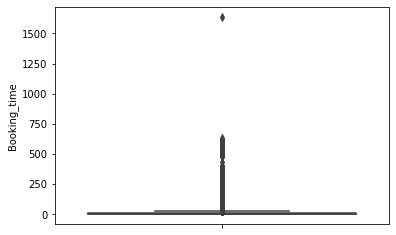

In [25]:
sns.boxplot(y=departure_final['Booking_time'])

<AxesSubplot:ylabel='Duration'>

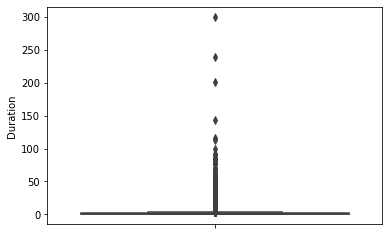

In [26]:
sns.boxplot(y=departure_final['Duration'])

In [27]:
departure_final.loc[(departure_final.Duration >4),'Duration']=4
departure_final.loc[(departure_final.Booking_time >36),'Booking_time']=36

<AxesSubplot:ylabel='Duration'>

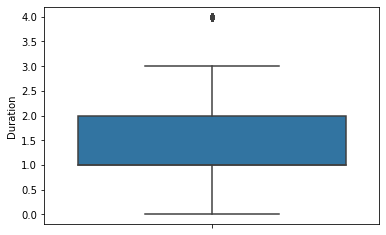

In [28]:
sns.boxplot(y=departure_final['Duration'])

<AxesSubplot:ylabel='Booking_time'>

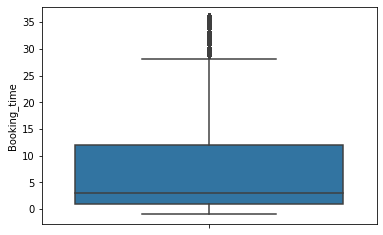

In [29]:
sns.boxplot(y=departure_final['Booking_time'])

In [30]:
departure_final.describe(percentiles=[0.99])

,Macro_RT,Continent,Source_Group,Duration,Booking_time,Room_Rate
count,91066.000000,91066.000000,91066.000000,91066.000000,91066.000000,91066.000000
mean,1.299552,3.541278,1.270134,1.785112,8.661158,5130.953953
std,0.602376,1.116491,1.132862,1.066842,11.620416,1151.520778
min,1.000000,0.000000,0.000000,0.000000,-1.000000,1611.280000
50%,1.000000,4.000000,1.000000,1.000000,3.000000,5000.000000
99%,4.000000,5.000000,4.000000,4.000000,36.000000,10000.000000
max,4.000000,7.000000,4.000000,4.000000,36.000000,25000.000000


In [31]:
departure_final.loc[(departure_final.Room_Rate >10000),'Room_Rate']=10000

In [32]:
#CORRELATION CHECK

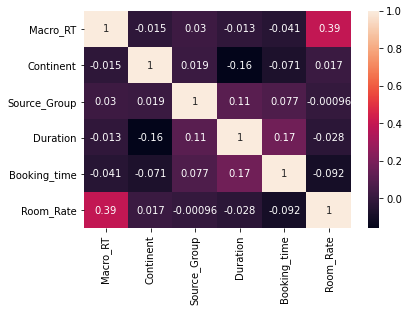

In [33]:
correlation_plot = sns.heatmap(departure_final.corr(), annot=True)

array([[<AxesSubplot:title={'center':'Room_Rate'}>]], dtype=object)

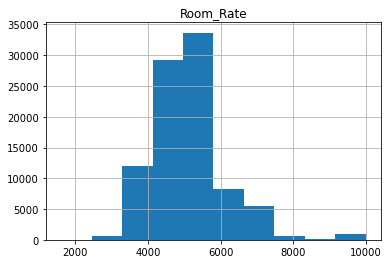

In [34]:
departure_final.hist(column='Room_Rate')

array([[<AxesSubplot:title={'center':'logRoom_Rate'}>]], dtype=object)

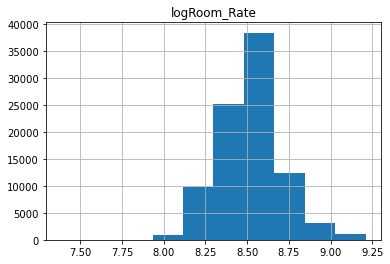

In [35]:
#Log Transformed
departure_final['logRoom_Rate'] = np.log1p(departure_final['Room_Rate'])
departure_final.hist(column='logRoom_Rate')

In [36]:
#PAIRPLOT

<Figure size 1296x1008 with 0 Axes>

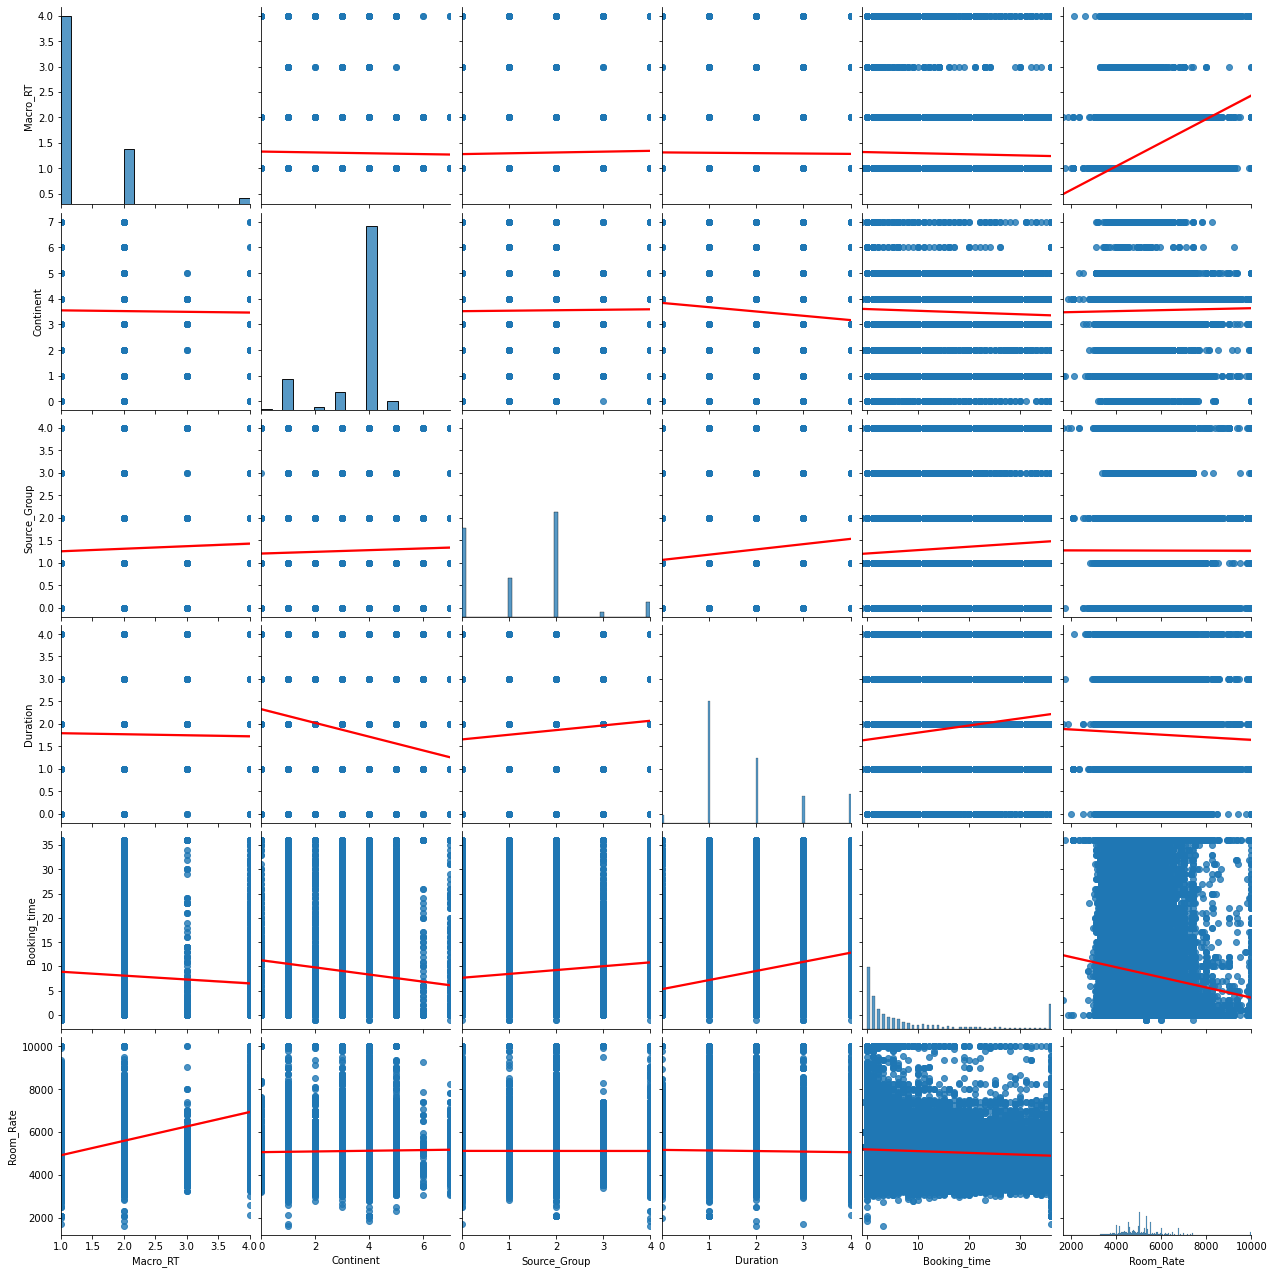

In [37]:
plt.figure(figsize=(18,14))

pairplot_data = departure_final[['Macro_RT','Continent', 'Source_Group', 'Duration', 
                        'Booking_time','Room_Rate']]

ax2 =sns.pairplot(pairplot_data, kind="reg", size=3,plot_kws={'line_kws':{'color':'red'}})
ax2

In [38]:
departure_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91066 entries, 0 to 91250
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Macro_RT      91066 non-null  int64  
 1   Continent     91066 non-null  int32  
 2   Source_Group  91066 non-null  int32  
 3   Duration      91066 non-null  int16  
 4   Booking_time  91066 non-null  int16  
 5   Room_Rate     91066 non-null  float64
 6   logRoom_Rate  91066 non-null  float64
dtypes: float64(2), int16(2), int32(2), int64(1)
memory usage: 3.8 MB


In [39]:
departure_final['logRoom_Rate'] = np.log1p(departure_final['Room_Rate'])

In [40]:
#TRAIN TEST SPLIT

In [41]:
train = departure_final.sample(frac=0.7,random_state=42)
test = departure_final.drop(train.index)

In [42]:
train.head()

,Macro_RT,Continent,Source_Group,Duration,Booking_time,Room_Rate,logRoom_Rate
33603,2,4,0,2,11,5779.15,8.662185
33490,1,4,2,1,10,8000.00,8.987322
19952,1,4,2,1,0,4547.33,8.422515
63232,1,4,0,1,0,4696.23,8.454728
18153,1,4,2,1,1,5500.00,8.612685


In [43]:
test.head()

,Macro_RT,Continent,Source_Group,Duration,Booking_time,Room_Rate,logRoom_Rate
2,1,4,2,4,5,5000.00,8.517393
5,1,4,0,1,3,4399.21,8.389408
14,1,4,1,1,4,4800.00,8.476580
15,1,4,0,2,23,5269.15,8.569814
16,1,4,1,1,1,4133.94,8.327228


In [44]:
X_train = train.drop(['Room_Rate','logRoom_Rate'],axis=1)
y_train = train['logRoom_Rate']
X_test = test.drop(['Room_Rate','logRoom_Rate'],axis=1)
y_test = test['logRoom_Rate']

In [45]:
#FITTING THE MODEL

In [46]:
#LINEAR REGRESSION

In [47]:
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import r2_score,mean_squared_error

In [48]:
reg = linear_model.LinearRegression()

In [49]:
reg.fit(X_train, y_train)

LinearRegression()

In [50]:
reg_Y_pred = reg.predict(X_test)

In [51]:
r2 = r2_score(y_test,reg_Y_pred)
r2

0.1267452662570535

In [52]:
mse_reg=mean_squared_error(y_test,reg_Y_pred)
rmse_reg=np.sqrt(mse_reg)
rmse_reg

0.1742095671463368

In [53]:
#K-FOLD

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
def kfold(departure_final, X_train, y_train, seed=7, scoring='accuracy', n_splits=10):
    results = []
    names = []
    for name, model in departure_final:
        kfold = model_selection.KFold(n_splits=n_splits, random_state=seed)
        cv_results = model_selection.cross_val_score(departure_final, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

In [55]:
reg.fit(X_train, y_train)

LinearRegression()

In [56]:
reg_Y_pred = reg.predict(X_test)

In [57]:
r2 = r2_score(y_test,reg_Y_pred)
r2

0.1267452662570535

In [58]:
mse_reg=mean_squared_error(y_test,reg_Y_pred)
rmse_reg=np.sqrt(mse_reg)
rmse_reg

0.1742095671463368